Цель исследования — изучив статистику с сайта агррегатора оценок выявить закономерности, определить наиболее перспективные платформы (на которых играют) и жанры игр (в которые играют)

 Так же проверим несколько гипотез:
* самая популярная платформа для игр - ПК
* количество игр с каждым годом растет

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные


Исследование пройдёт несколько этапов:

* [Обзор данных](#обзор-данных)
* [Предобработка данных](#предобработка-данных)
* [Исследовательский анализ данных](#исследовательский-анализ-данных)
* [Поиск зависимостей и закономерностей по регионам](#портрет-пользователя)
* [Проверка гипотез](#проверка-гипотез)
* [Подведение итогов и написание выводов](#общий-вывод)


Задача — получить данные,выполнить предобработку, изучить их, найти интересные особенности и зависимости развития индустрии игропрома, оформить результатов.

### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p4.csv')
pd.set_option("display.max_columns", None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(df.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

пропуски:

In [5]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [6]:
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных


названия столбцов

In [7]:
df.columns = df.columns.str.lower()

### Обработка пропусков

всего пропусков:

    Name                  2
    Year_of_Release     269
    Genre                 2
    Critic_Score       8578
    User_Score         6701
    Rating             6766

судя по всему данные являются обьединением 2х источников; в одном были информации по продажам по регионам с названиям игр, а остальные столбцы были заполнены информацией с сайта https://www.metacritic.com  и большая часть пропусков образовалась вследствие остутсвия части игр на сайте; большинство отстутсвующих игр не являются крупными, в основном это старые проекты когда аггрегаторы оценок не существовали, а так же нишевые прооекты (а так же часть пропусков изза различных ошибок парсинга или небольших отличий в названии)

In [8]:
display(df[df["genre"].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:

df = df[~df["genre"].isna()]

Есть несколько вариантов как можно заполнить пропуски в оценках:
* заполнить их найдя информацию о оценках в интернете, ведь и аггрегатор не один, да и информация могла быть не заполнена изза ошибки
* удостоверится что большая часть пропусков соответствует отстутсвию информации на крупном аггрегаторе \ относится к старой игре которая вышла задолго до их появления, а значит информация не могла повлиять на оценку в момент покупки: заполнить critic_score и user_score нулями
* обьединить эти два варианта: сначала попробовать заполнить информацией из открытых источников, а оставшееся незаполненым - проставить заглушки - (-1), которые будут указывать нам на отдельную группу - игр которых покупали не руководствуясь оценками

* для заполнения оценки пользователей используем заглушку (-1)
* пропусков в дате выхода игры не так много, просто удалим эти строки

изменим тип ячейки critic_score на int

In [10]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df["critic_score"] = df["critic_score"].fillna(-1)
df["critic_score"] = df["critic_score"].round()

In [12]:
df["critic_score"] = df["critic_score"].astype(int)

In [13]:
df[df["user_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1,NaN,NaN


заполним остутсвующие user_score заглушкой (-1)

In [14]:
df["user_score"] = df["user_score"].fillna(-1)

In [15]:
df[df["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,-1,-1,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,-1,-1,NaN


In [16]:
df = df[~df["year_of_release"].isna()]

In [17]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1,-1,NaN


In [18]:
df["user_score"].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd в user_score означает to be discribe => будет определено(заполнено) позже. скорее всего это означает что игра достаточно новая и оценки от игроков еще не успели набраться. Аналогично ситуации с пропущенным значением заполним '-1' -  ведь оценки еще никак не успели повлиять на статистику продаж

In [19]:
df["user_score"] = df["user_score"].replace("tbd", -1)

C:\Users\Freo\AppData\Local\Temp\ipykernel_24520\2823051548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["user_score"] = df["user_score"].replace("tbd", -1)


временно заменим рейтинг (который кстати в большинстве старых игр будет Е(everyone) ) на 'Q', и будем считать его временно неопределенным, а потом решим что с ним делать, заполнять аналочно оценкам сделав по названиями \ заполнять по жанрам; не заполнять вообще посчитав не особо важным, особенно для этой категории старых, малопродаваемых игр

In [20]:
df["rating"] = df["rating"].fillna("Q")

C:\Users\Freo\AppData\Local\Temp\ipykernel_24520\147465479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"] = df["rating"].fillna("Q")


на всякий случай избавимся от явных дубликатов если они есть

In [21]:
df = df.drop_duplicates()

скорее всего причина которая привела к образованию пропусков - обьединение нескольких баз данных, одна из которых использовалась для дополнения второй, и не имела всех игр имеющихся в первой (например к данным по продажам игр по регионам добавили описание игр, взятой из другого места, которое не покрыло полностью)

In [22]:
df["year_of_release"] = df["year_of_release"].astype(float)
df["year_of_release"] = df["year_of_release"].astype(int)
df["user_score"] = df["user_score"].astype(float)

все числовые значения приводим к флоату и инту для возможности построить по ним графики и посчитать корреляцию

расчитаем суммарные продажи во всех регионах в отдельный столбец.

In [23]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

## Исследовательский анализ данных

рассмотрим сколько игр выпускалось в разные годы. На основании результатов выберем наиболее актуальный период

In [24]:
grp_year = df.groupby("year_of_release")["critic_score"].count()

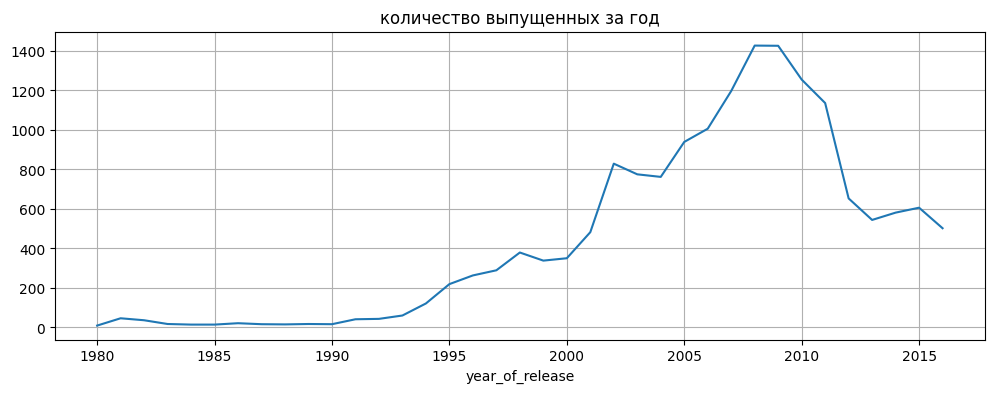

In [25]:
grp_year.plot(figsize=(12, 4), grid=True, title="количество выпущенных за год");

для актуального планирования важны будут данные после приличного падения количества игр в 12-13 годах, количество в следующем году будет приближаться этому периоду а не общему среднему / максимальному

Рассмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим графики распределения по годам. Оценим жизненный цикл платформ

* Сначала по продажам количества копий, для каждой платформы, по годам

In [26]:
grp_platf_sales = df.groupby("platform")["total_sales"].sum()
grp_platf_sales_20 = grp_platf_sales.sort_values(ascending=False).head(20)

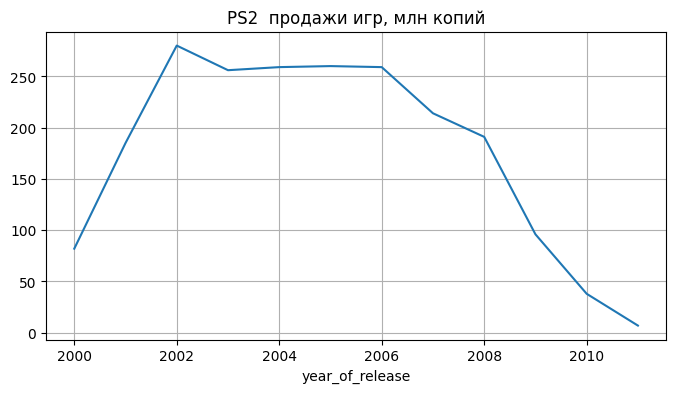

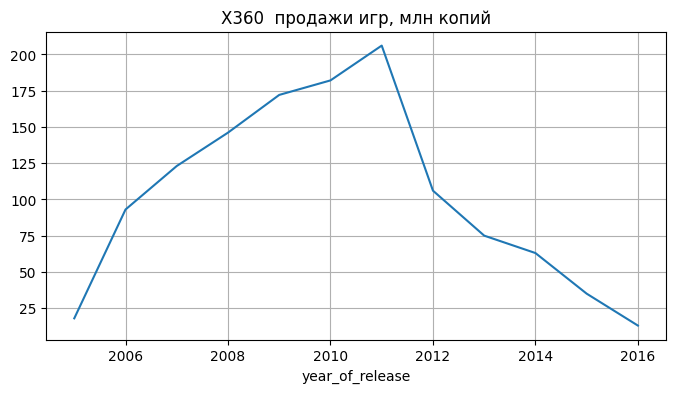

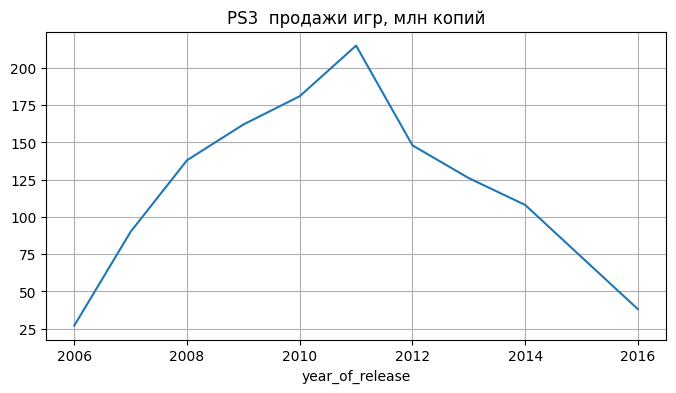

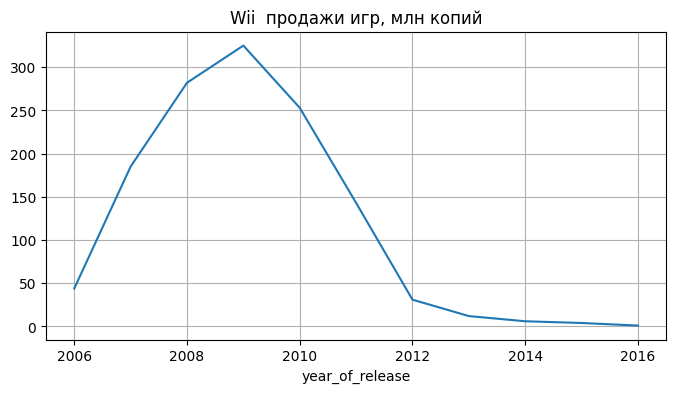

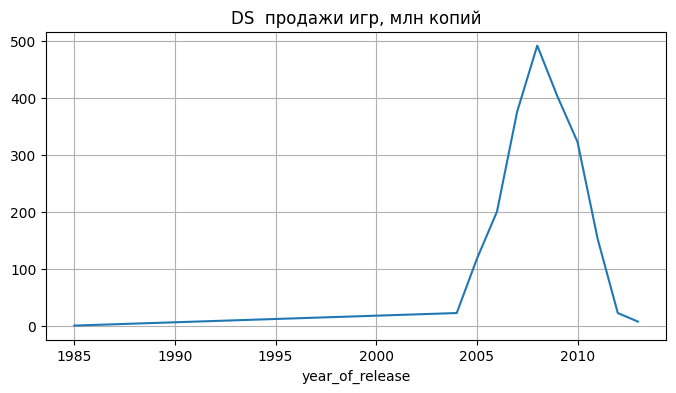

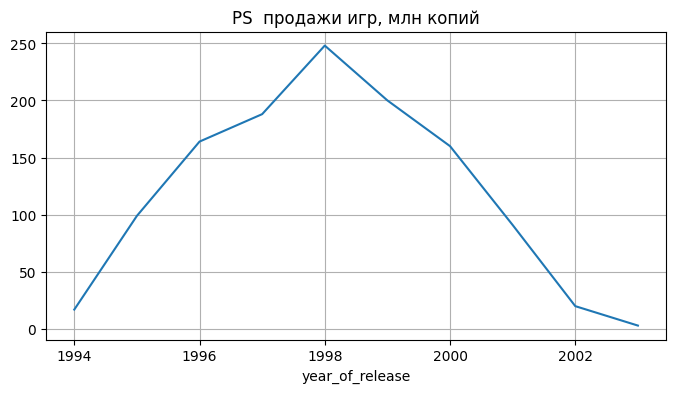

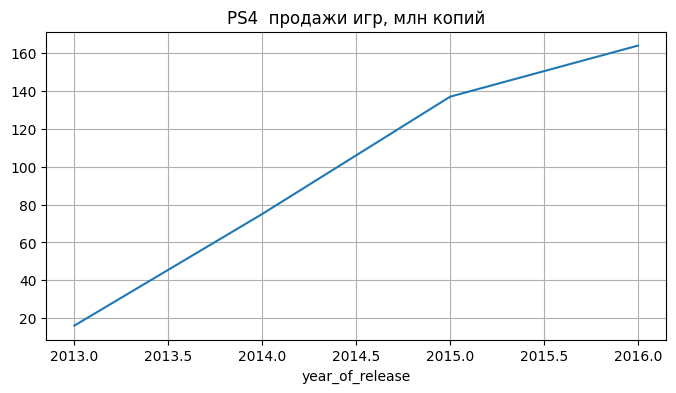

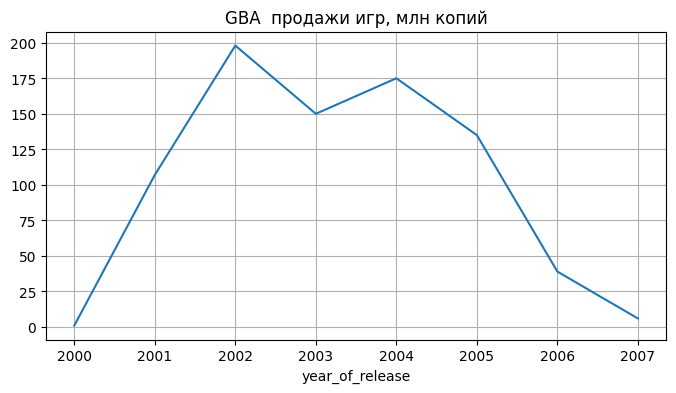

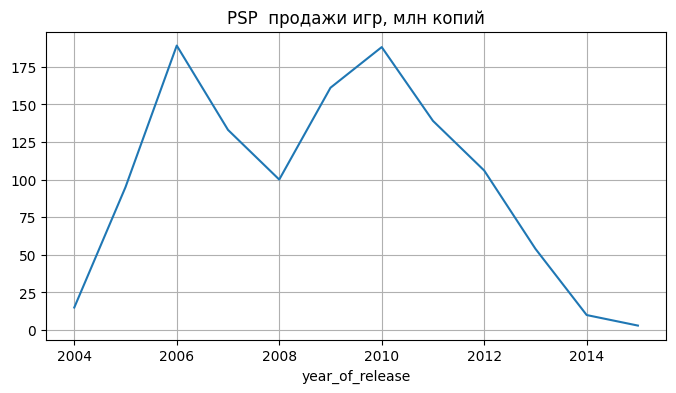

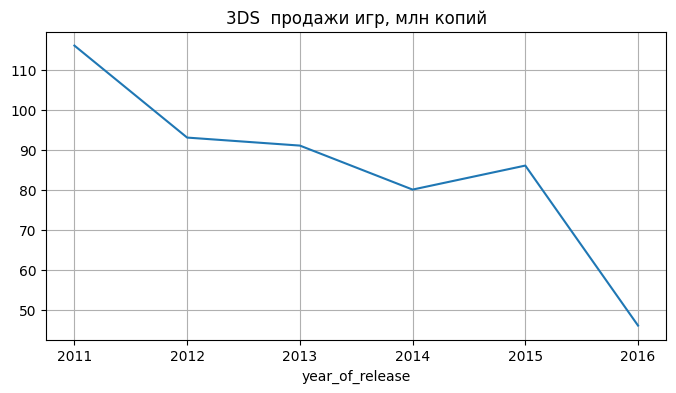

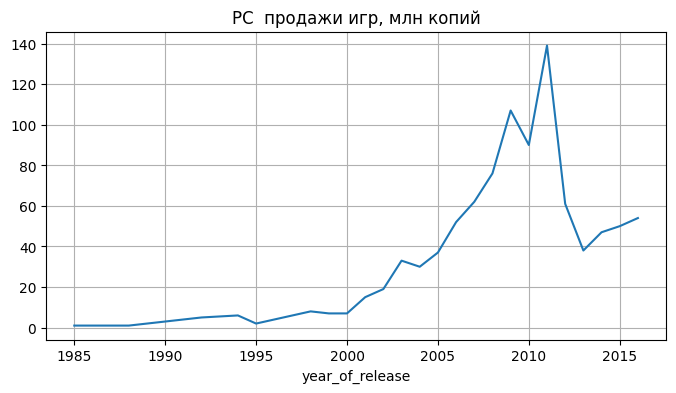

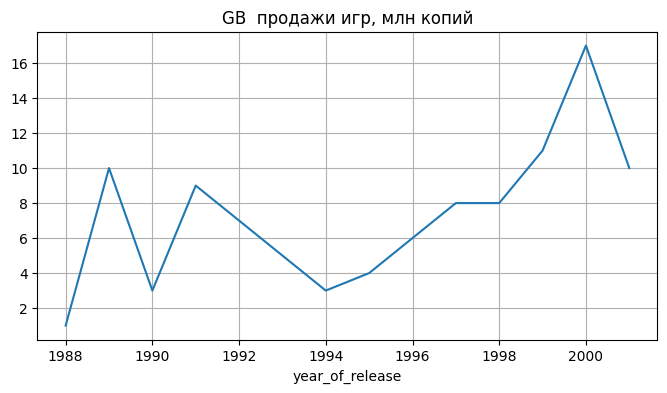

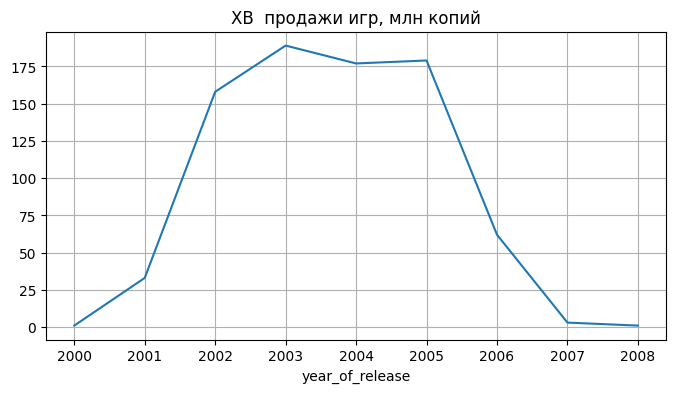

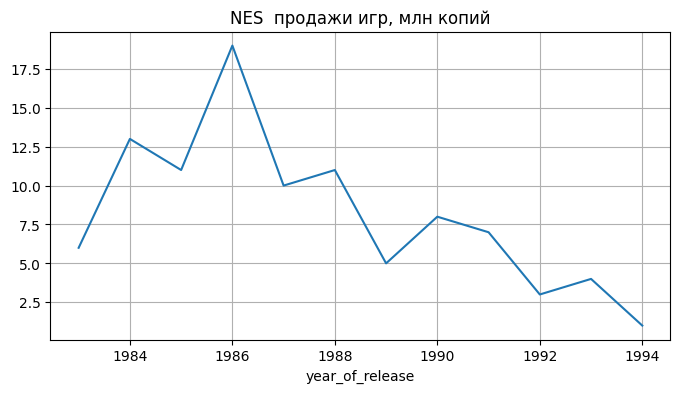

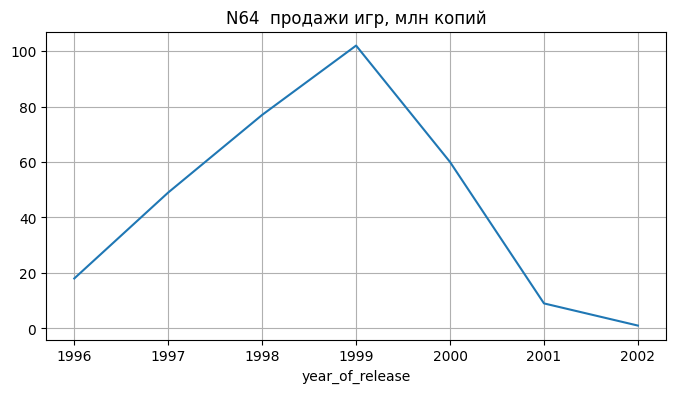

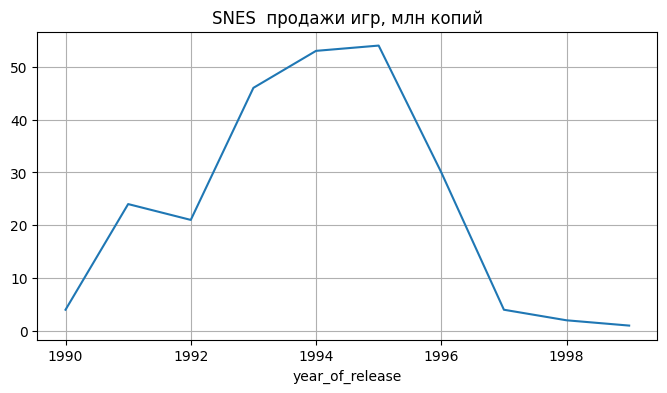

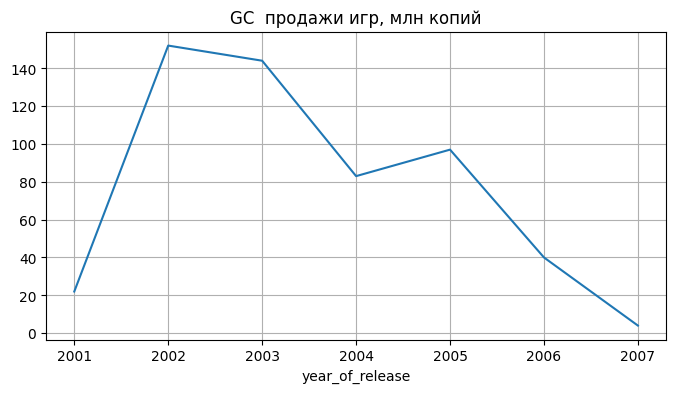

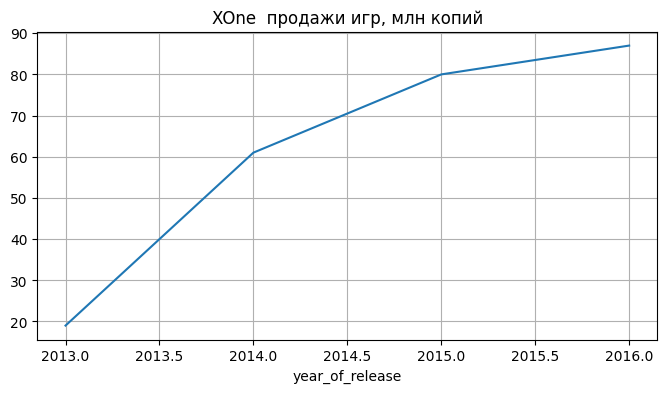

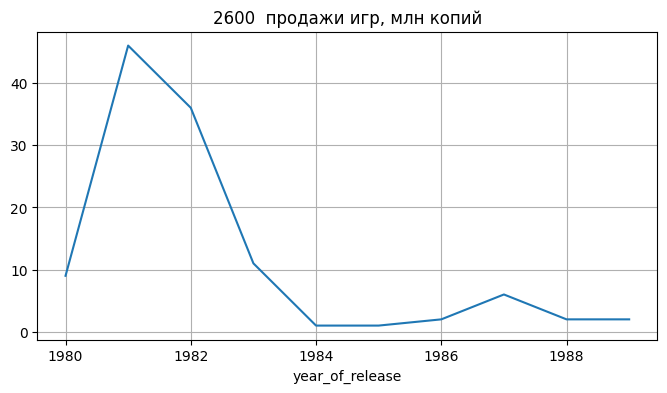

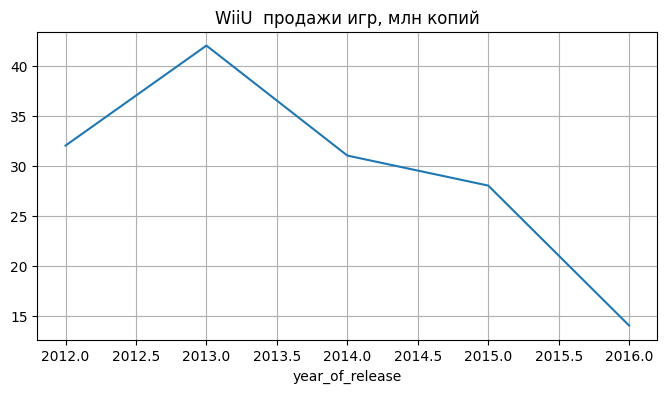

In [27]:
for plat in grp_platf_sales_20.index:
    
    iter_pivot_platform_20_sales = df[df["platform"] == plat].pivot_table(
        index="year_of_release", values="platform", aggfunc="count"
    )
    iter_pivot_platform_20_sales.plot(
        figsize=(8, 4), title=plat + "  " + "продажи игр, млн копий",legend=None, grid = True
    )
    
    #plt.ticklabel_format(style="plain")

* затем по количеству выпущенных на эти платформы игр, по годам

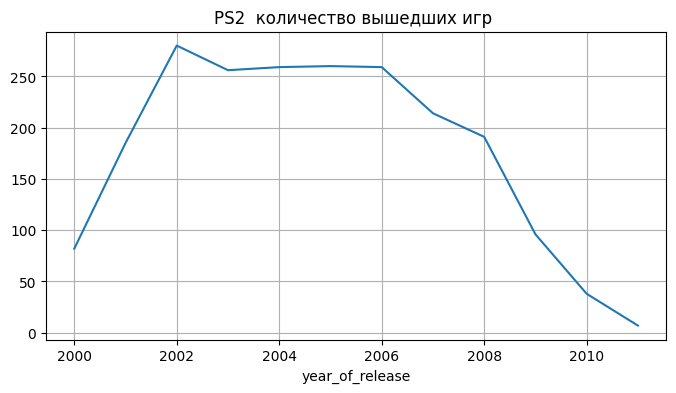

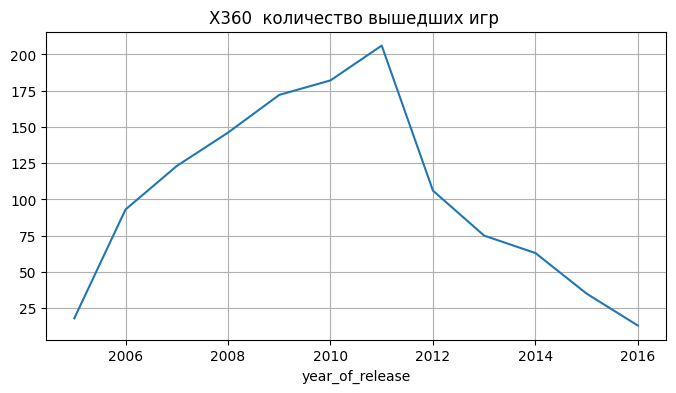

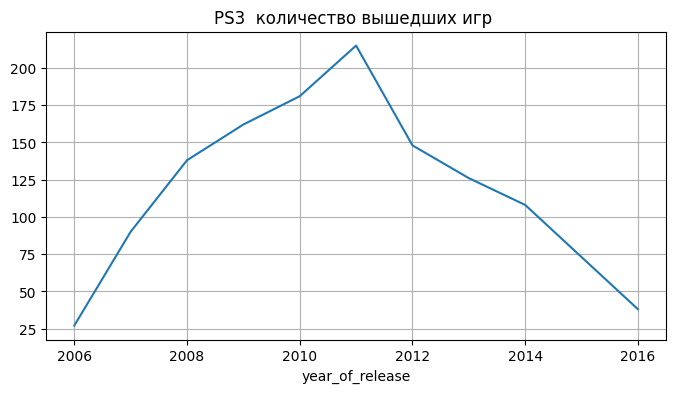

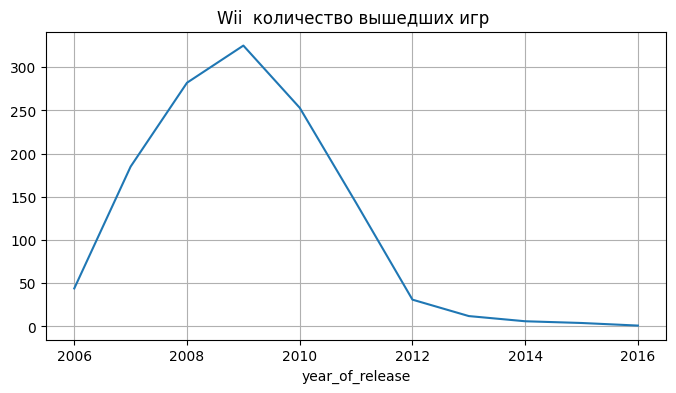

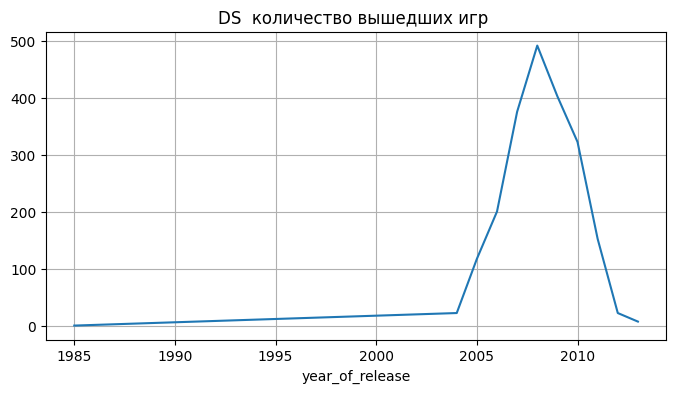

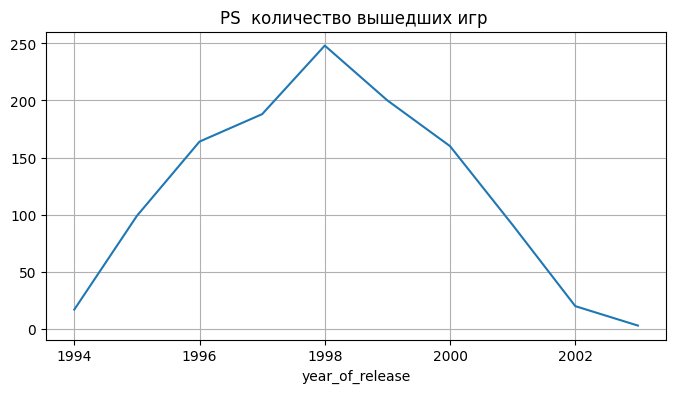

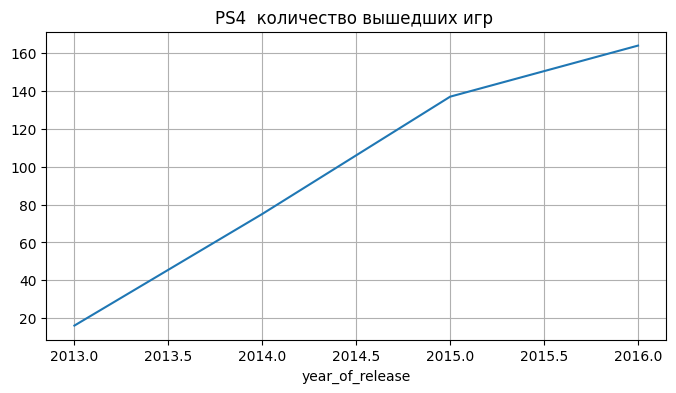

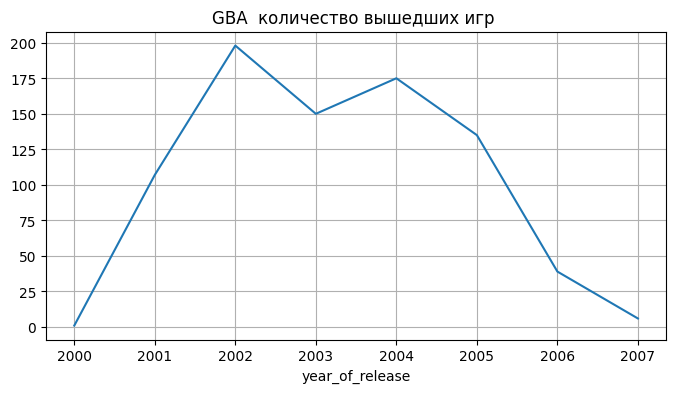

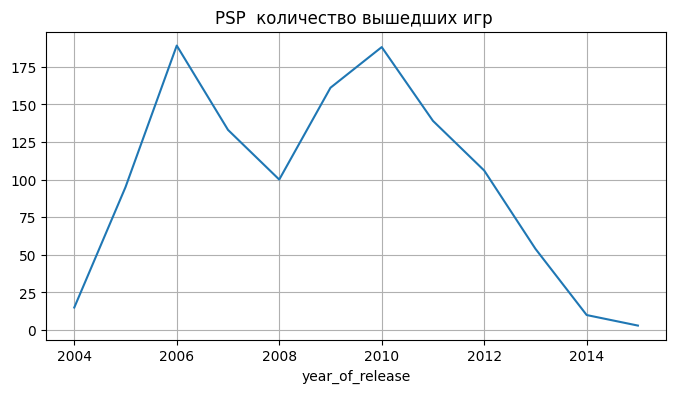

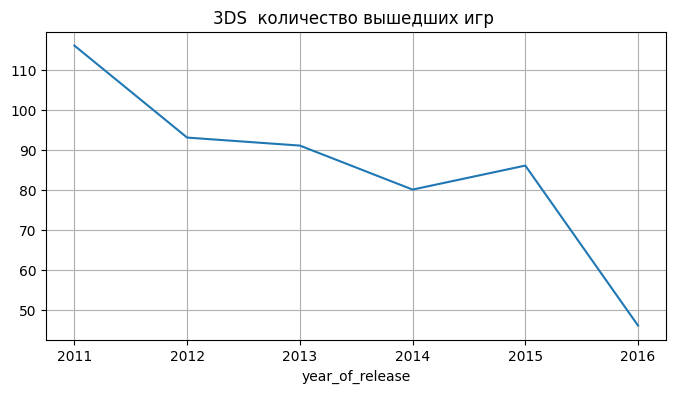

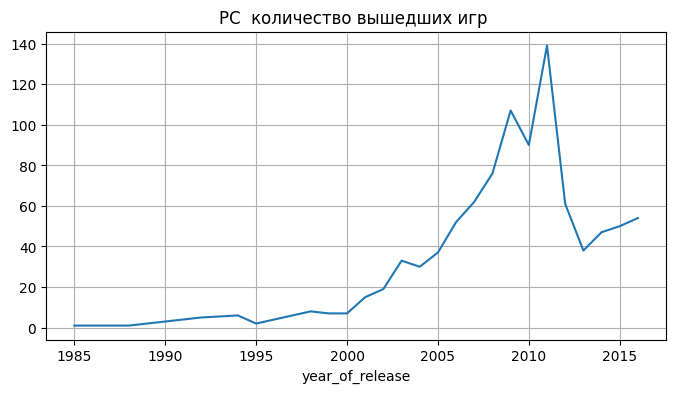

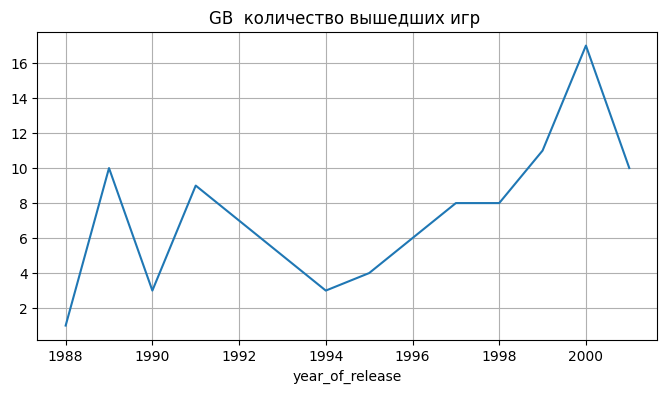

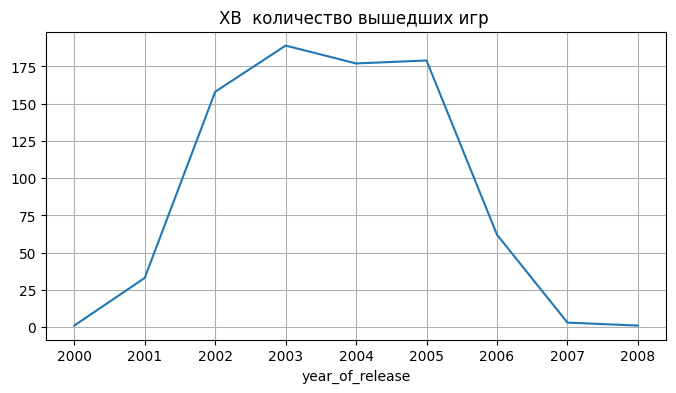

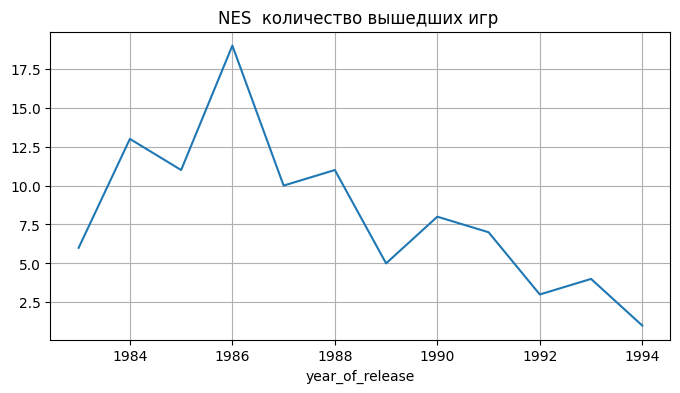

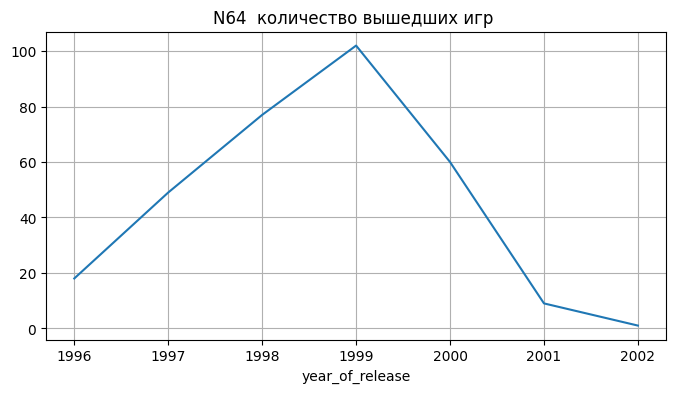

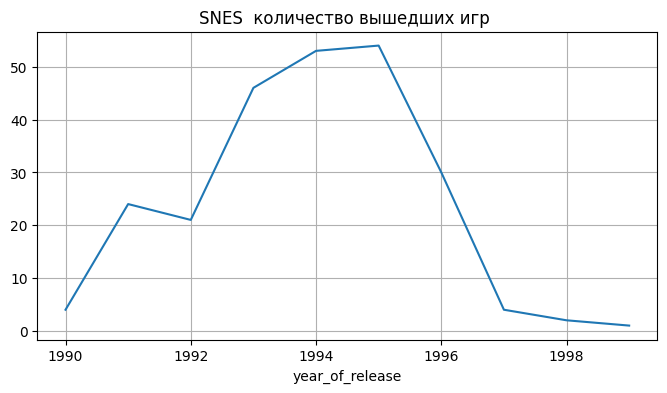

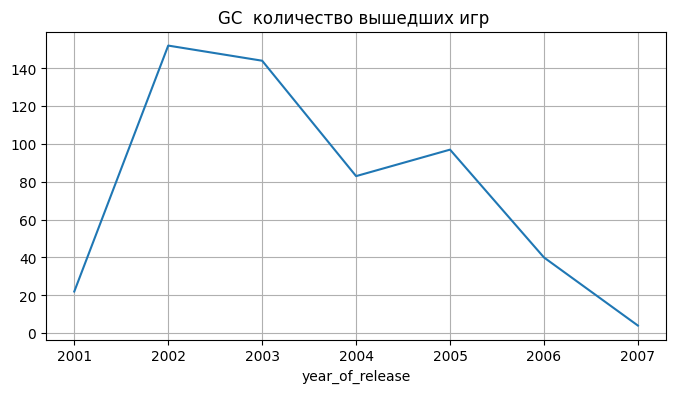

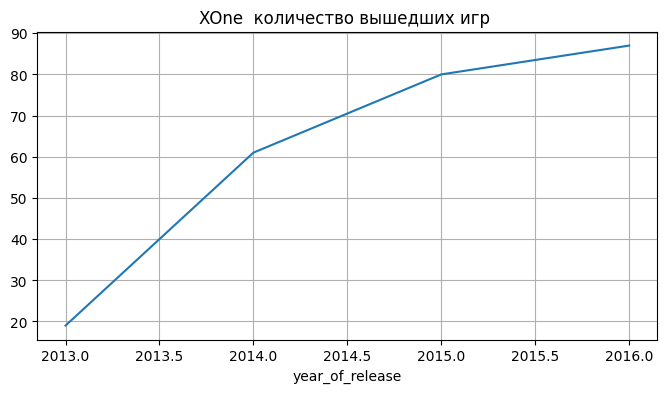

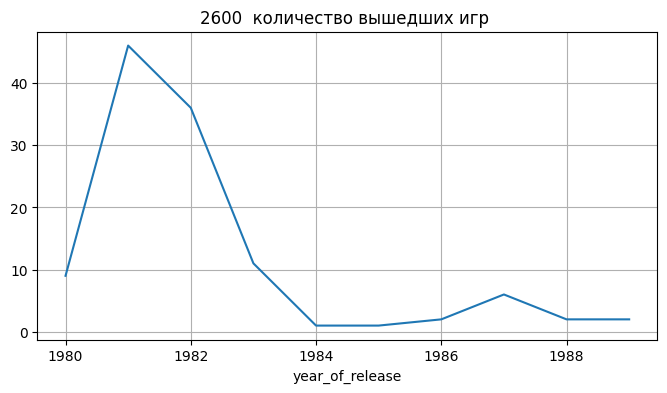

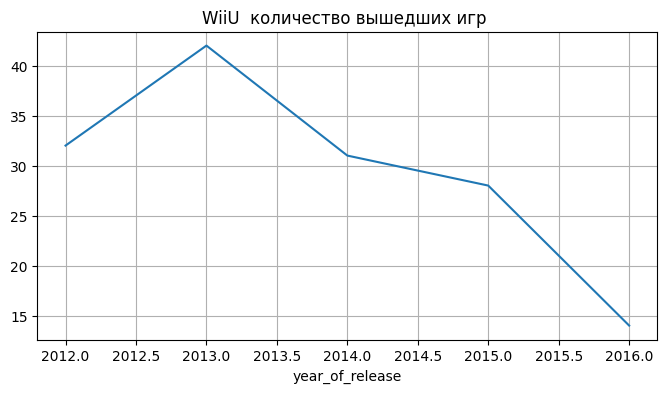

In [28]:
for plat in grp_platf_sales_20.index:
    iter_pivot2 = df[df["platform"] == plat].pivot_table(
        index="year_of_release",
        values="platform",
        aggfunc="count",
    )
    iter_pivot2.plot(figsize=(8, 4), title=plat+ "  " + "количество вышедших игр ", legend=None, grid = True)

* жизненный цикл платформы в среднем за **10 лет**; более современные появляются и пропадают немного быстрее: **6-10**

Для наглядности эволюции индустрии игропрома построим их все на одном графике:

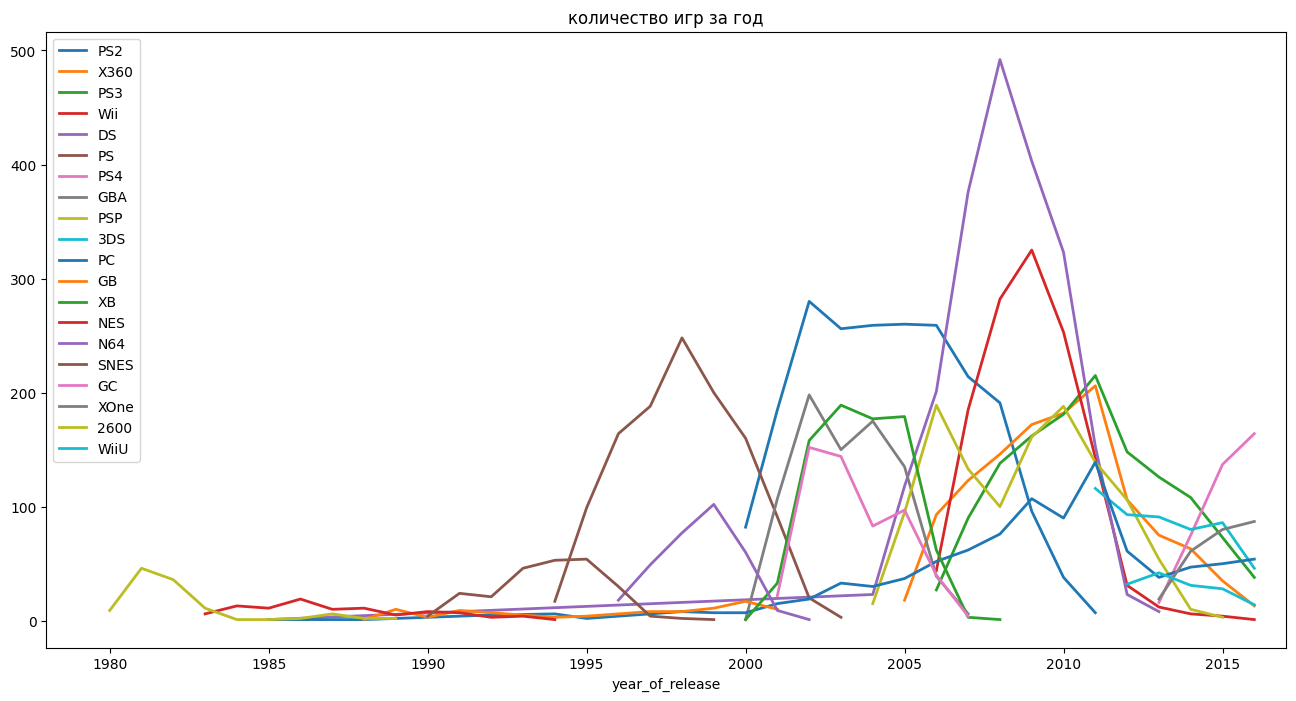

In [29]:
lables = []
for plat in grp_platf_sales_20.index:
    lables.append(plat)


fig, ax = plt.subplots()

for plat in grp_platf_sales_20.index:
    # print (plat)

    iter_pivot_platform_20_sales = df[df["platform"] == plat].pivot_table(
        index="year_of_release", values="total_sales", aggfunc="count"
    )
    iter_pivot_platform_20_sales.plot(
        figsize=(16, 8), ax=ax, title="количество игр за год", xlim=(1978, 2017),linewidth = 2
    )
    ax.legend(lables)

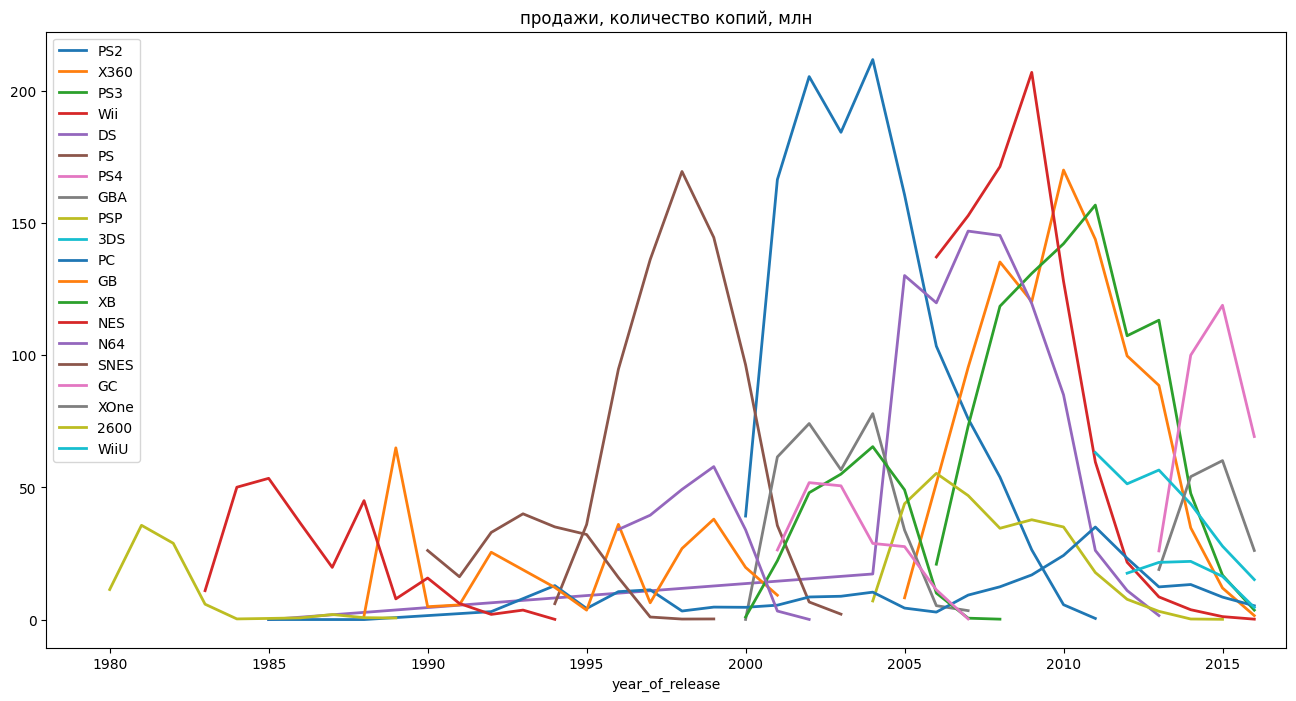

In [30]:
lables = []
for plat in grp_platf_sales_20.index:
    lables.append(plat)


fig, ax = plt.subplots()

for plat in grp_platf_sales_20.index:
    # print (plat)

    iter_pivot_platform_20_sales = df[df["platform"] == plat].pivot_table(
        index="year_of_release", values="total_sales", aggfunc="sum"
    )
    iter_pivot_platform_20_sales.plot(
        figsize=(16, 8), ax=ax, title="продажи, количество копий, млн", xlim=(1978, 2017),linewidth = 2
    )
    ax.legend(lables)

Можно предположить что на графике - результат частичного перехода игровой индустрии на подписочные сервисы, с абонентской платой, когда покупается не игра а годовая подписка от крупных студий на все ее релизы.

Актуальным периодом будут данные с 2013

на рынке игр появились 2 серьезных конкурента: PS4 и Xbox One, Рынок ПК закончил падение и выровнялся, прошлые лидеры (ps3 и x360) уже прилично упали с пика и не сильно испортят нам картину неактуальной информацией


создадим для удобства анализа датафрейм с актуальными данными (с 2013 года)

In [31]:
df_actual = df[df["year_of_release"] >= 2013]

посмотрим что получилось:

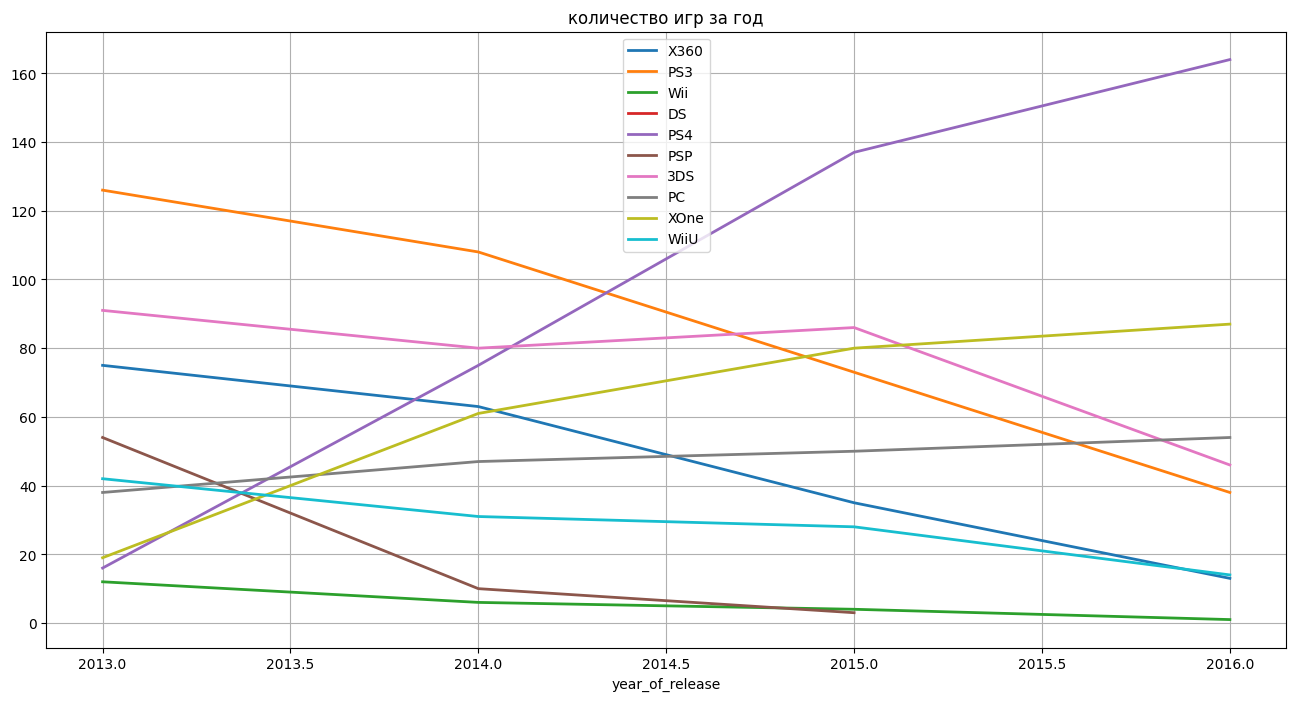

In [32]:
lables = []  

fig, ax = plt.subplots()

for plat in grp_platf_sales_20.index:
    try:
        iter_pivot_platform_20_sales = df_actual[
            df_actual["platform"] == plat].pivot_table(
            index="year_of_release",values="total_sales", aggfunc="count")
        iter_pivot_platform_20_sales.plot(figsize=(16, 8), ax=ax, title="количество игр за год",linewidth = 2, grid = True)

        lables.append(plat)
        ax.legend(lables)
        #print('среднее количество игр за год в актуальном периоде у', plat, iter_pivot_platform_20_sales['total_sales'].mean())

    except:
        continue

найдем самые перспективные платформы, построив графики продаж за актуальный период

средний уровень продаж, количество копий за год, в актуальном периоде, млн X360 34.2
средний уровень продаж, количество копий за год, в актуальном периоде, млн PS3 45.357499999999995
средний уровень продаж, количество копий за год, в актуальном периоде, млн Wii 3.415
средний уровень продаж, количество копий за год, в актуальном периоде, млн DS 1.54
средний уровень продаж, количество копий за год, в актуальном периоде, млн PS4 78.535
средний уровень продаж, количество копий за год, в актуальном периоде, млн PSP 1.1666666666666667
средний уровень продаж, количество копий за год, в актуальном периоде, млн 3DS 35.8125
средний уровень продаж, количество копий за год, в актуальном периоде, млн PC 9.857500000000002
средний уровень продаж, количество копий за год, в актуальном периоде, млн XOne 39.830000000000005
средний уровень продаж, количество копий за год, в актуальном периоде, млн WiiU 16.157500000000002


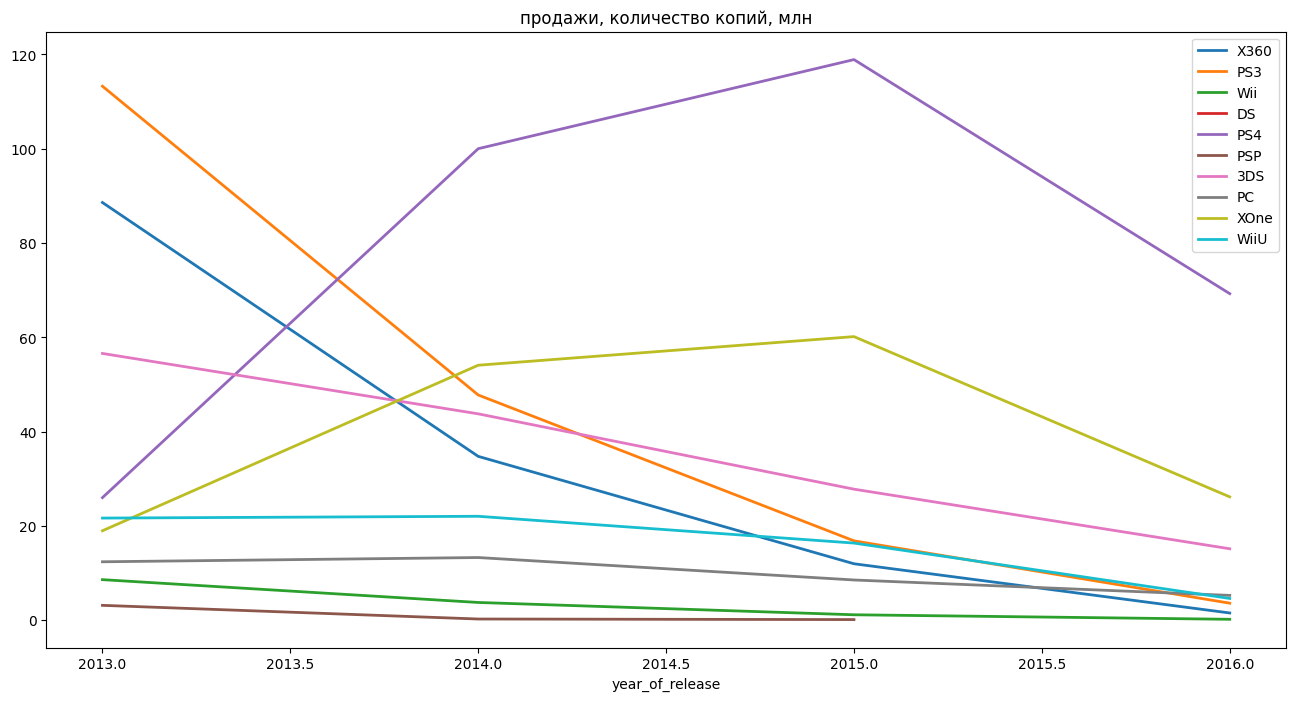

In [33]:
lables = []
actual_mean_prom = []

fig, ax = plt.subplots()

for plat in grp_platf_sales_20.index:
    try:
        iter_pivot_platform_20_sales = df_actual[df_actual["platform"] == plat].pivot_table(
            index="year_of_release", values="total_sales", aggfunc="sum"
        )
        iter_pivot_platform_20_sales.plot(
            figsize=(16, 8), ax=ax, title="продажи, количество копий, млн",linewidth = 2)
        
        lables.append(plat)
        ax.legend(lables)
        list_inlist = []
        list_inlist.append(plat)
        list_inlist.append(iter_pivot_platform_20_sales['total_sales'].mean())
        actual_mean_prom.append(list_inlist)
        print('средний уровень продаж, количество копий за год, в актуальном периоде, млн', plat, iter_pivot_platform_20_sales['total_sales'].mean())
        
    except:
        continue
        
#actual_mean_prom       
        

In [34]:
#print(actual_mean_prom)

In [35]:
var = []
for x in actual_mean_prom:
    var.append(x[1])
var2 = sorted(var, reverse = True)
print(var2)

[78.535, 45.357499999999995, 39.830000000000005, 35.8125, 34.2, 16.157500000000002, 9.857500000000002, 3.415, 1.54, 1.1666666666666667]


составим список из 5 "наиболее продающихся платформ"
* на будущее примем в расчет то что при одинаковых и близкий значениях платформы находящиеся в конце своего жизненого цикла будут менее предпочтительны

In [36]:
promising_v2 = ['PS4','PS3','XOne','3DS','X360']

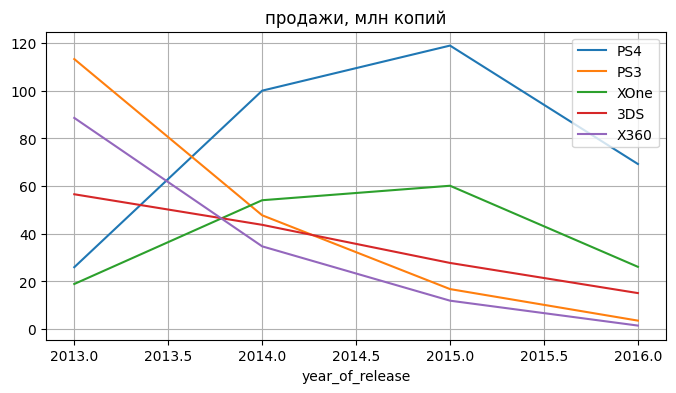

In [37]:
fig, ax = plt.subplots()

for el in promising_v2:
    iter_pivot_platform_20_sales = df_actual[df_actual["platform"] == el].pivot_table(
        index="year_of_release", values="total_sales", aggfunc="sum"
    )
    iter_pivot_platform_20_sales.plot(
        figsize=(8, 4), ax=ax, title="продажи, млн копий", grid = True
    )
    ax.legend(promising_v2)

* спад на графике отчасти обусловлен тем что игры вышедшие в актуальном (2016) году еще не успели раскрыть свой потенциал продаж

потенциально выгодные платформы:  PS4, XOne, PS3, 3DS, X360;
(падение продаж игр для 3ds так же может быть обусловленно выходом новой версии New Nintendo 3DS и 3DS XL в 2014 году)

по продажам с большим отрывом лидируют консоли, **рынок захватили 2 гиганта-конкурента; Sony и Microsoft** с моделями **playstation и xbox** разного вида

построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

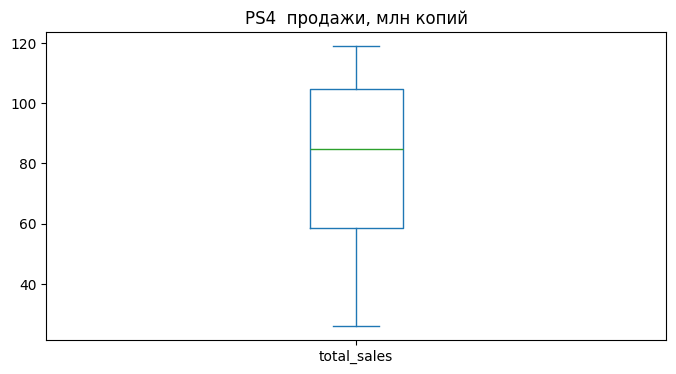

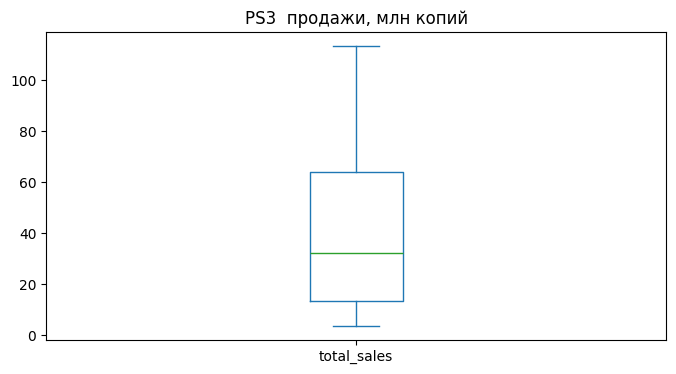

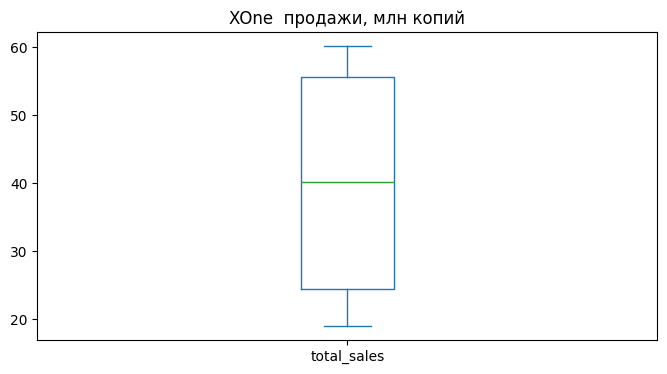

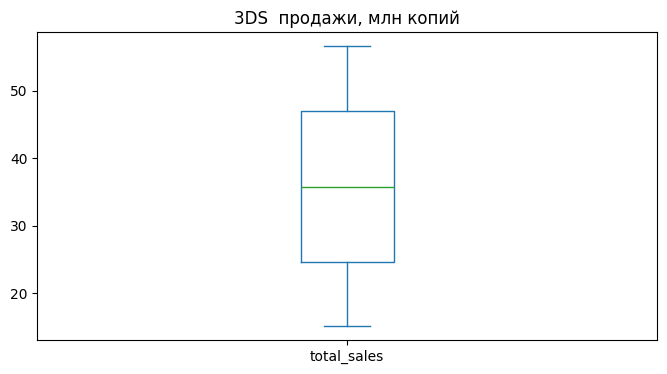

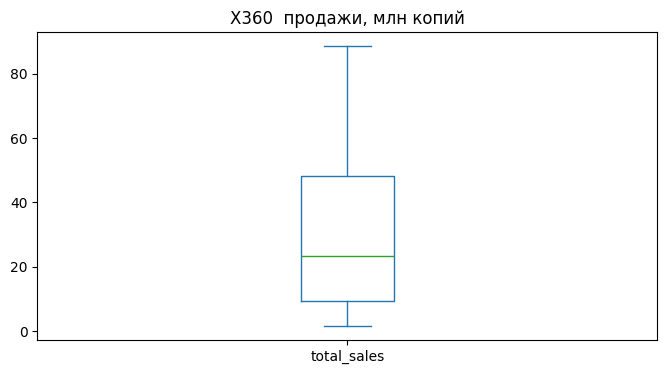

In [38]:
#for plat in grp_platf_sales_20.index: # если нужен полный
for plat in promising_v2: #если только актуальный
    iter_pivot_platform_20_sales = df_actual[df_actual["platform"] == plat].pivot_table(
        index="year_of_release", values='total_sales', aggfunc="sum"
    )
    iter_pivot_platform_20_sales.plot(
        kind="box", figsize=(8, 4), title=plat + "  " + "продажи, млн копий"
    )

Для наглядности посмотрим на одном графике

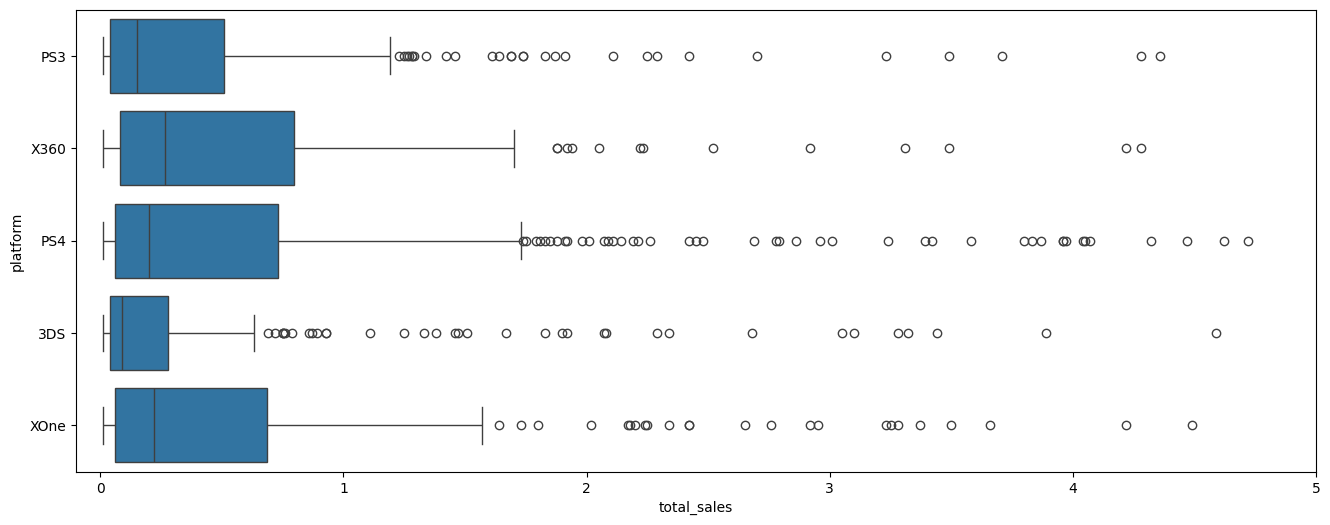

In [39]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_actual[df_actual['platform'].isin(promising_v2)], y='platform', x='total_sales')
plt.xlim(-0.1, 5)
plt.show()

медианы смещены влево, значит у этих платформ есть выбивающиеся по количеству продаж хиты, сильно смещающие среднее вверх

посмотрим как влияют на продажи отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [40]:
print(
    f"корреляция между общими продажами и рейтингом критиков для PS4",
    df_actual[df_actual["platform"] == "PS4"]["total_sales"].corr(df_actual["critic_score"]),
)

корреляция между общими продажами и рейтингом критиков для PS4 0.22652606614612358


In [41]:
print(
    df_actual[(df_actual["platform"] == "PS4") & (df_actual["critic_score"] != -1)]["total_sales"].corr(
        df_actual["critic_score"]
    )
)

0.4065679020617816


если сравнить только имеющиеся оценки (вспомним что -1 в столбце означает отстутсвтие оценке на аггрегаторе) кореляция получится немного выше

Axes(0.125,0.11;0.775x0.77)


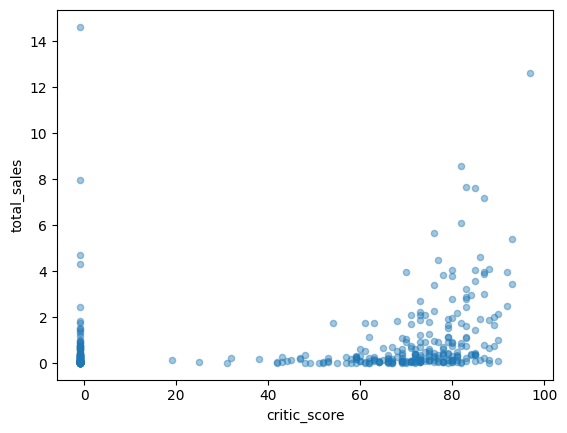

In [42]:
print(
    df_actual[df_actual["platform"] == "PS4"].plot(
        x="critic_score", y="total_sales", kind="scatter", alpha=0.415
    )
)

* как мы и предполагали большинство отстуствующих значений в отзывах критиков соответсвтуют относительно небольшим продажам

судя по цифрам кореляция оценок критиков и продаж низко-средняя, однако тот факт что она начинает явственно проявляться при высоких оценках в категории игр с выдающимися продажами - говорит нам о том что эта связь есть, впрочем данных недостаточно чтобы сразу сказать что является причиной, а что следствием; высокие продажи следствие высокого рейтинга или высокий рейтинг - следствие высоких проджаж :)

но точно можно сказать что у игр которых оценили средне (~60-70) нет выдающихся продаж

Соотнесем с продажами игр на других платформах

PS4
с учетом игр без рецензий 0.22652606614612358
без учета игр без рецензий 0.4065679020617816
PS3
с учетом игр без рецензий 0.27846212019685473
без учета игр без рецензий 0.3342853393371919
XOne
с учетом игр без рецензий 0.27378217261702115
без учета игр без рецензий 0.41699832800840164
3DS
с учетом игр без рецензий 0.060809027021315305
без учета игр без рецензий 0.35705661422881035
X360
с учетом игр без рецензий 0.24563559661086257
без учета игр без рецензий 0.3503445460228664


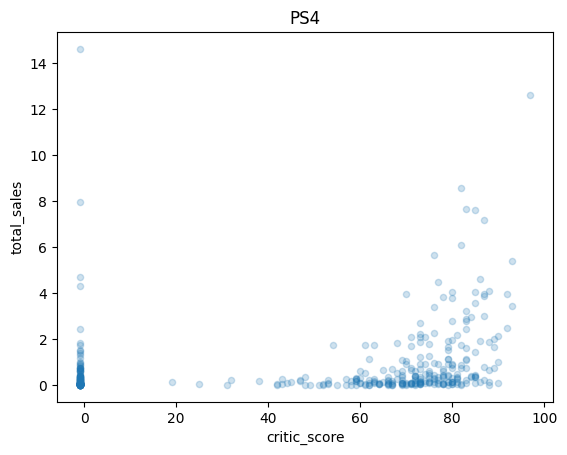

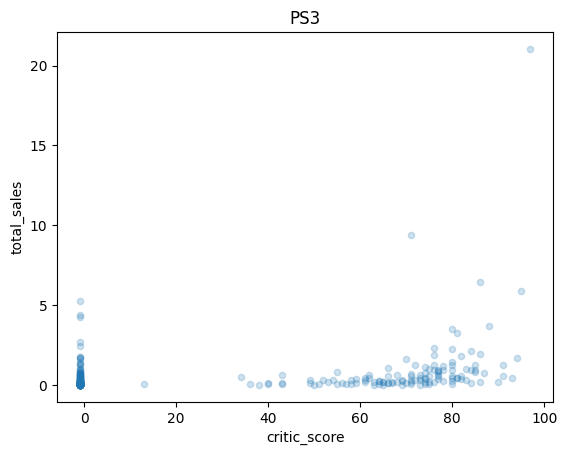

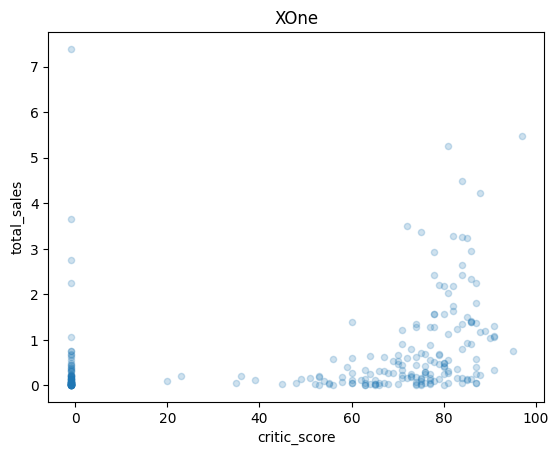

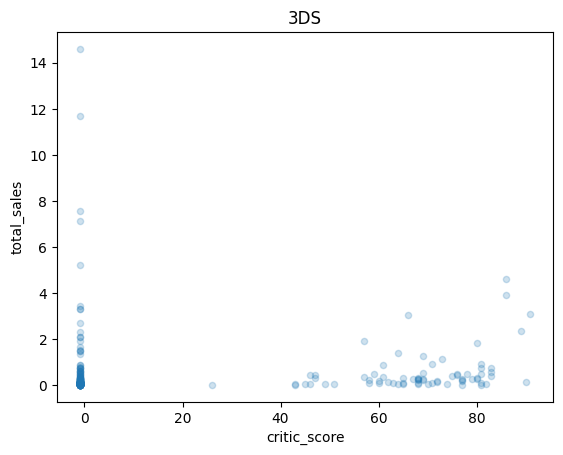

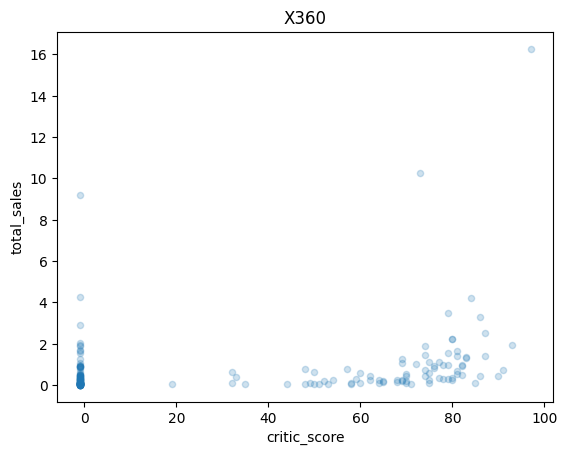

In [43]:
for el in promising_v2:
    print (el)
    print('с учетом игр без рецензий',df_actual[df_actual["platform"] == el]["total_sales"].corr(df_actual["critic_score"]))
    print('без учета игр без рецензий',df_actual[(df_actual["platform"] == el) & (df_actual["critic_score"] != -1)]["total_sales"].corr(df_actual["critic_score"]))
    df_actual[df_actual["platform"] == el].plot(
        x="critic_score", y="total_sales", kind="scatter", title=el, alpha=0.215
    )
    # ax.legend(promising)

вы целом ситуация похожа - большой рейтинг - больше бестселлеров; низкий рейтинг - бестселеров нет; принимаем ваши чемоданы почтой, и игра будет 10\10 GOTY открытие года

построим диаграмму рассеивания:

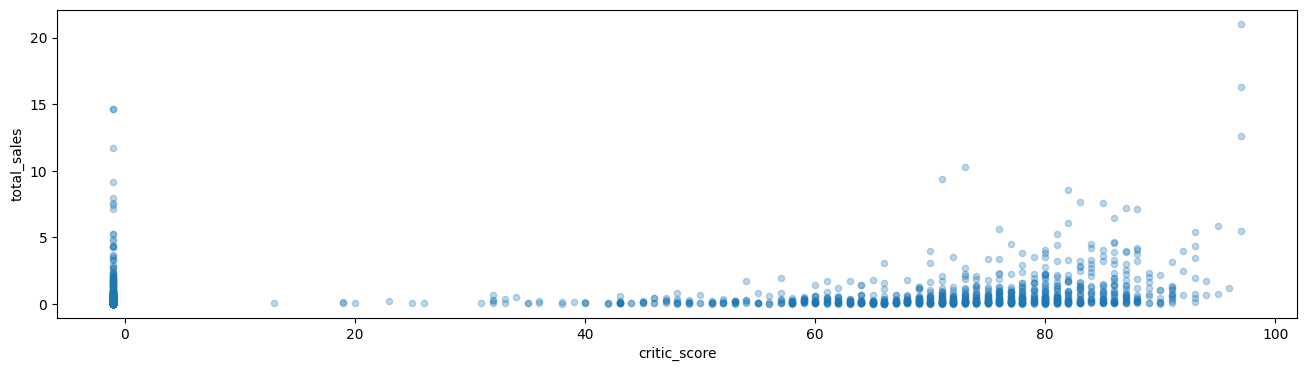

In [44]:
df_actual.plot(x="critic_score", y="total_sales", kind="scatter", alpha=0.295, figsize=(16, 4));

In [45]:
df["total_sales"].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

* создадим переменные "усов" и "коробки" для установления границ осей на графиках, значения за которыми будут выбросами

In [46]:
#df_actual.describe()
#df_actual.describe().loc[["25%", "75%"]]

# левая граница "коробки"
box_from = df_actual.describe().loc["25%"]

# правая граница "коробки"
box_to = df_actual.describe().loc["75%"]

# усы :{
mustache = (df_actual.describe().loc["75%"] - df_actual.describe().loc["25%"]) * 1.5

построим тот же график в рамках "усов"

(0.0, 0.955)

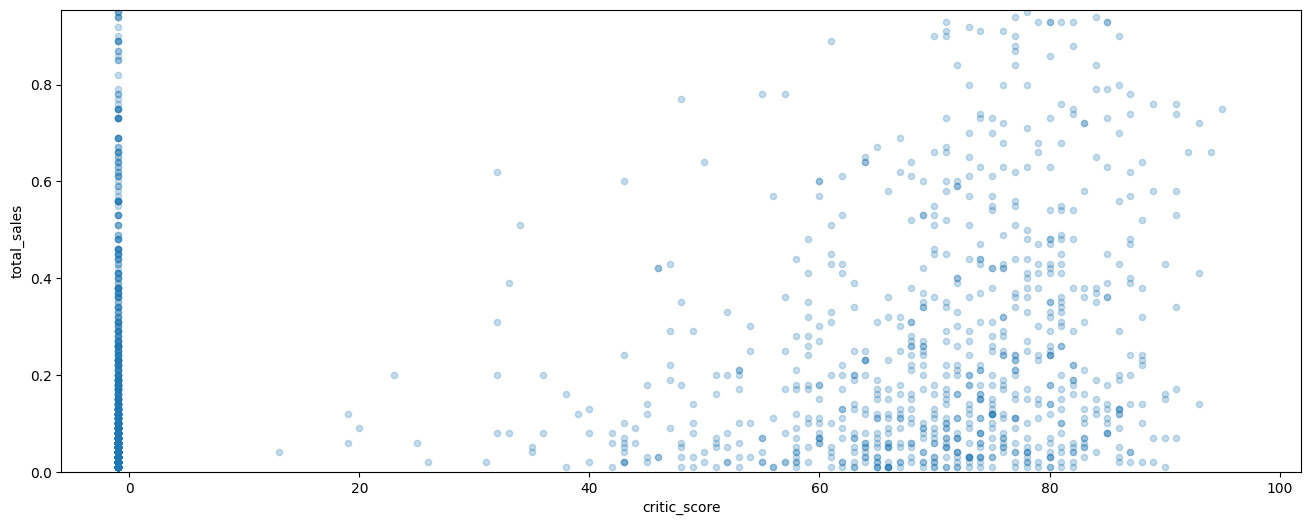

In [47]:
df_actual.plot(x="critic_score", y="total_sales", kind="scatter", alpha=0.255, figsize=(16, 6));
sales_range_from = box_from["total_sales"] - mustache["total_sales"]
sales_range_to = box_to["total_sales"] + mustache["total_sales"]
sales_range_from = 0 if sales_range_from < 0 else sales_range_from

plt.ylim(sales_range_from, sales_range_to)

игры только с наличием оценки

(0.0, 0.955)

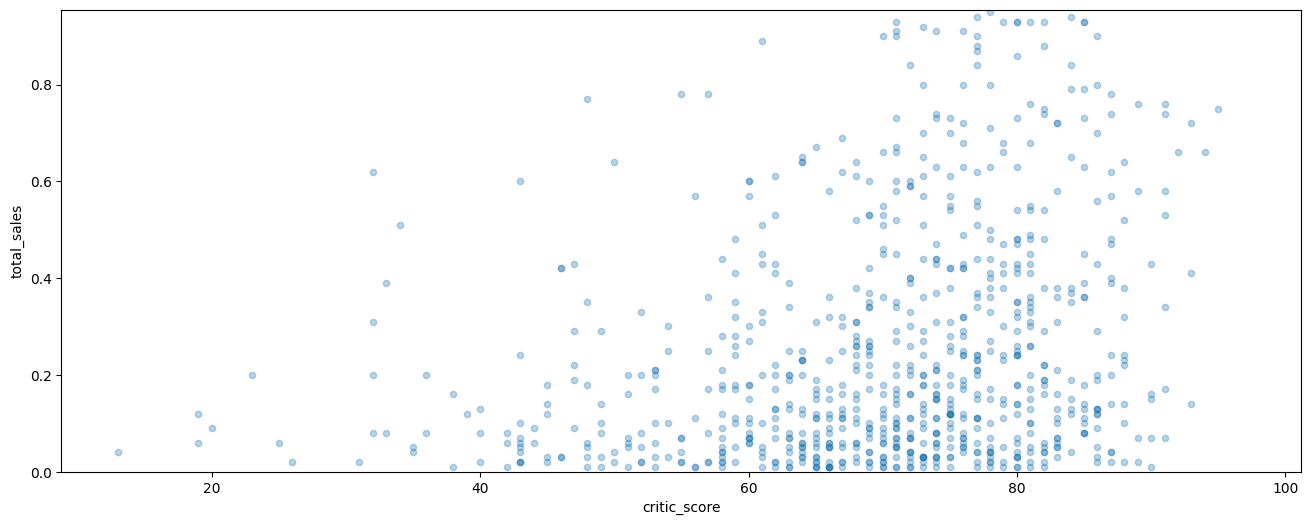

In [48]:
df_actual[df_actual["critic_score"] != -1].plot(x="critic_score", y="total_sales", kind="scatter", alpha=0.315, figsize=(16, 6));
sales_range_from = box_from["total_sales"] - mustache["total_sales"]
sales_range_to = box_to["total_sales"] + mustache["total_sales"]
sales_range_from = 0 if sales_range_from < 0 else sales_range_from

plt.ylim(sales_range_from, sales_range_to)

Рассмотрим общее распределение игр по жанрам. Найдем самые прибыльные.

In [49]:
pivot_genres_sales = df_actual.pivot_table(index='genre', values='total_sales', aggfunc=('count',"sum",'mean'))

In [50]:
print('по количеству игр')
display(pivot_genres_sales.sort_values(by='count', ascending=False))

по количеству игр


,count,mean,sum
genre,,,
Action,766,0.420196,321.87
Role-Playing,292,0.499623,145.89
Adventure,245,0.096490,23.64
Sports,214,0.703972,150.65
Shooter,187,1.245882,232.98
Misc,155,0.405290,62.82
Racing,85,0.469294,39.89
Fighting,80,0.441375,35.31
Platform,74,0.576081,42.63


In [51]:
print('по общему количеству продаж копий, млн')
display(pivot_genres_sales.sort_values(by='sum', ascending=False))

по общему количеству продаж копий, млн


,count,mean,sum
genre,,,
Action,766,0.420196,321.87
Shooter,187,1.245882,232.98
Sports,214,0.703972,150.65
Role-Playing,292,0.499623,145.89
Misc,155,0.405290,62.82
Platform,74,0.576081,42.63
Racing,85,0.469294,39.89
Fighting,80,0.441375,35.31
Adventure,245,0.096490,23.64


In [52]:
print('по среднему количеству продаж одной игры, млн')
display(pivot_genres_sales.sort_values(by='mean', ascending=False))

по среднему количеству продаж одной игры, млн


,count,mean,sum
genre,,,
Shooter,187,1.245882,232.98
Sports,214,0.703972,150.65
Platform,74,0.576081,42.63
Role-Playing,292,0.499623,145.89
Racing,85,0.469294,39.89
Fighting,80,0.441375,35.31
Action,766,0.420196,321.87
Misc,155,0.405290,62.82
Simulation,62,0.350968,21.76


самые прибыльные жанры (в сумме) - экшен, шутеры и спорт 
самые прибыльные в пересчете на одну игру - шутеры и спорт и платформереры(внезапно!)

## Портрет пользователя

Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Топ 5 платформ. Их отличия в доле рынка.
* Топ 5 жарнров
* Влияние рейтинга ESRB на продажи в регионах

In [53]:
list_region_sales_col_names = ["na_sales", "eu_sales", "jp_sales"]

list_for_region_test = ["platform", "genre", "rating"]

# rating = q это заглушка;
# однако держим в уме предположение что ее наличие соответсвтует большой части игр категории Е, а так же играм которым  еще не поставили

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


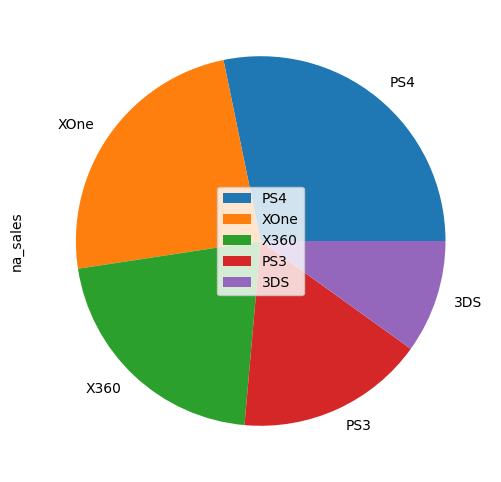

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


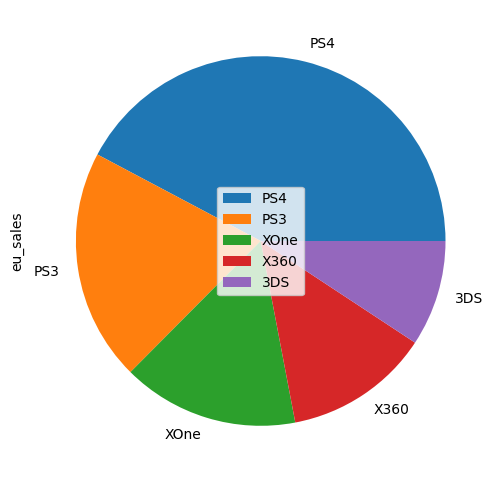

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


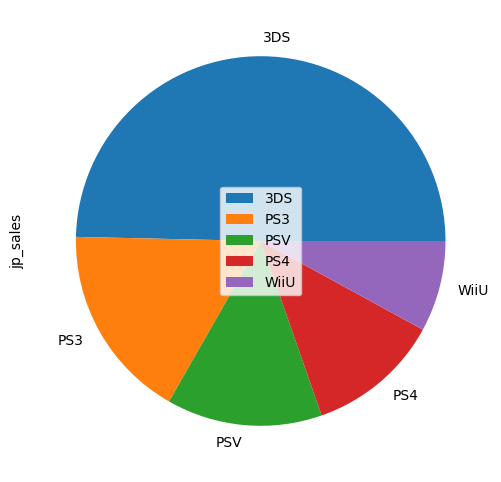

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


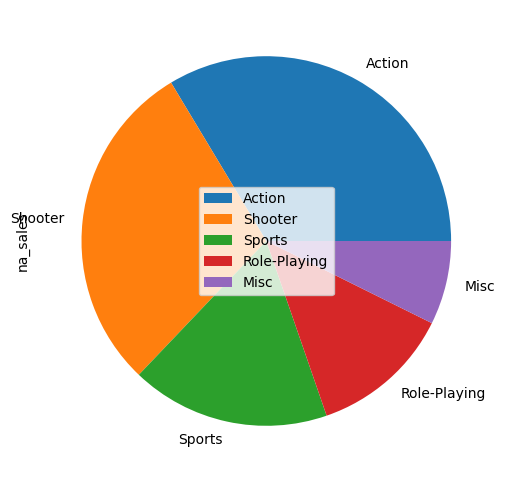

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


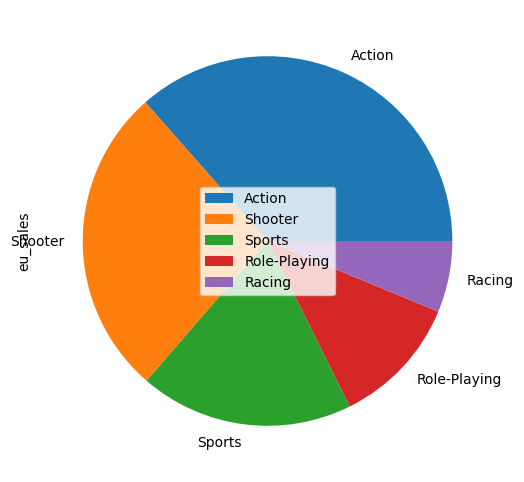

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


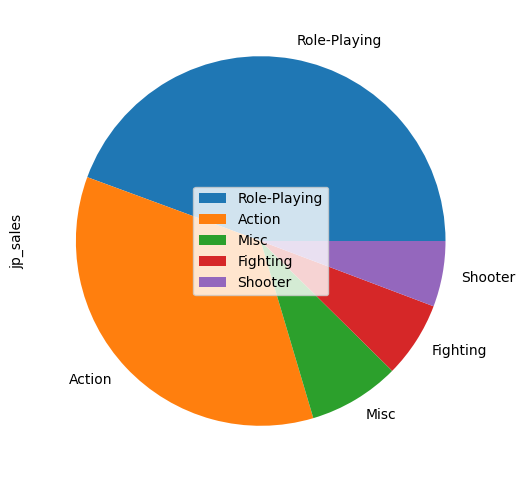

,na_sales
rating,
M,165.21
Q,89.42
E,79.05
E10+,54.24
T,49.79


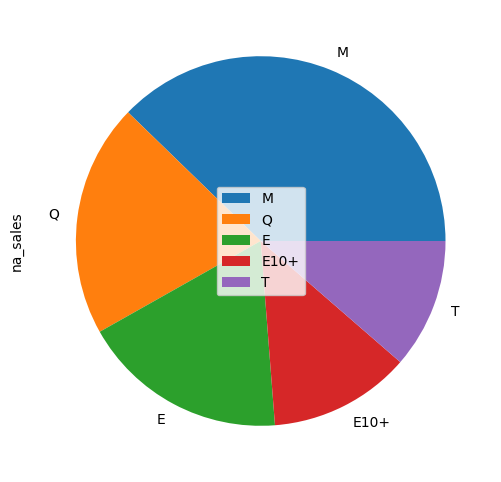

,eu_sales
rating,
M,145.32
E,83.36
Q,78.91
E10+,42.69
T,41.95


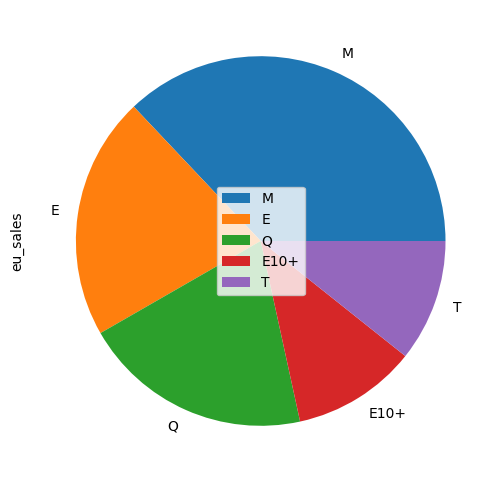

,jp_sales
rating,
Q,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


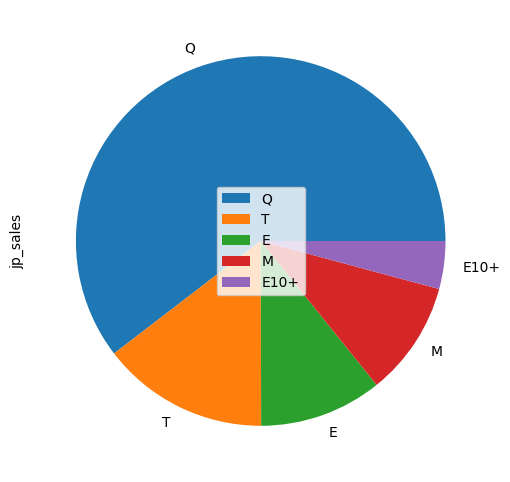

In [54]:
for test in list_for_region_test:
    for region in list_region_sales_col_names:

        iter_pivot_region_sales_sum = df_actual.pivot_table(index=test, values=region, aggfunc="sum")
        

        for_pie = iter_pivot_region_sales_sum.sort_values(by=region, ascending=False).head()
        display (for_pie)
        
        for_pie.plot(kind ='pie',figsize=(6,6), subplots=True)
        plt.legend(loc=10)
        plt.show()

Портрет пользователей:

платформы:
* в америке полный паритет в противостоянии сони и майкрософта, идут 1к1, нинтендо пытается найти свою нишу
* в европе сони уверенно захватило рынок, и обогнало оппонента более чем в 2 раза, нинтендо пытается найти свою нишу
* в японии полнейшее импортозамещние, нинтендо уверенно закрывает потребности 60% рынка новинок, сони различными моделям - оставишеся 40, а продукты майкрософта на японском рынке сосем не пользуются популярностью


жанры:
* вкусы америки и европы совпадают практически идентично, основные короли рынка: экшен, шутер, спорт, рпг
* в японии же большая часть (80%) поделена поровну всего между двумя жанрами - рпг и экшен; спорт - даже не входит в топ5; а так же  можно отметит файтинги, которые в других странах пользовались куда меньшей популярностью

рейтинг ESRB:
* америка и европа, так же как и при сравнении жанров практически идентичны; ретинг М (mature, 18+) составляет приличную часть всего рынка
* в японии % соотношение рейтинга М меньше примерно в 3 раза, а так же очень большая часть игр не имеет оценки ESRB
при беглом просмотре разных игр не имеющих рейтинга - принадлежности к одной рейтинговой категории не найдено, есть как М, так и Е, итд. Впрочем у них есть своя система оценки CERO, которая может просто оценивать по другим стандартам или правилам продажи, что вызовет серьезный перекос

в Японии большинство игр не имеют рейтинга ESRB - однако судя по всему это техническая особенность заполнения базы, при поиске конкретных игр ESRB - у них есть;   
В зависимости от наших целей использовать его может быть некорректно, так как у японии есть свое рейтинговая система оценок CERO, и игра имеющая в Европе один рейтинг может иметь в Японии совсем другой, что может привести к ошибкам и неправильному планированию

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

сформулируем гипотезу что среднее выборок одинакого, проверим какая вероятность получить разброс подобный нашему с помощью т-теста

* H0 - средние пользовательские рейтинги платформы XboxOne равны средним пользовательским рейтингам платформы PC

* H1 - средние пользовательские рейтинги платформы XboxOne и средние пользовательским рейтингам платформы PC - разные

используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var)

In [55]:
alpha = 0.10
results = st.ttest_ind(
    df_actual[(df_actual["platform"] == "XOne") & (["user_score"] != -1)]["user_score"],
    df_actual[(df_actual["platform"] == "PC") & (["user_score"] != -1)]["user_score"],
)
# print(results)

print("p-значение:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.20111399900783597
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action  и Sports  разные.

* H0 - средние пользовательские рейтинги жанра Action и средние пользовательские рейтинги Sports - разные
* H1 - средние пользовательские рейтинги жанра Action и средние пользовательские рейтинги Sports - равны

In [56]:
alpha = 0.10
results = st.ttest_ind(
    df_actual[(df_actual["genre"] == "Action") & (["user_score"] != -1)]["user_score"],
    df_actual[(df_actual["genre"] == "Sports") & (["user_score"] != -1)]["user_score"],
)


print("p-значение:", results.pvalue)

if results.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.02193663336455412
Не получилось отвергнуть нулевую гипотезу


### проверим гипотезу что самая популярная платформа для игр - ПК
сравним попарно с XboxOne и PS4 количеству проданных игр в актуальном периоде (начиная с 2013г)

PC и XBoxOne

* H0 - среднее количество продаж на ПК больше за актуальный период выше среднего количества продаж на XBoxOne

In [57]:
alpha = 0.05

xbo_tt = df_actual[df_actual["platform"] == "XOne"]["total_sales"]
pc_tt = df_actual[df_actual["platform"] == "PC"]["total_sales"]

results = st.ttest_ind(pc_tt, xbo_tt)

print("p-значение:", results.pvalue / 2)

if results.pvalue / 2 < alpha and  pc_tt.mean() < xbo_tt.mean():
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.507465195118443e-08
Отвергаем нулевую гипотезу


ПК и ПС4

* H0 - среднее количество продаж на ПК больше за актуальный период выше среднего количества продаж на PS4

In [58]:
alpha = 0.05

pc_tt = df_actual[df_actual["platform"] == "PC" ]["total_sales"]
ps4_tt = df_actual[df_actual["platform"] == "PS4"]["total_sales"]

results = st.ttest_ind(ps4_tt, pc_tt)
# print(results)

print("p-значение:", results.pvalue / 2)

if results.pvalue / 2 < alpha and  pc_tt.mean() < ps4_tt.mean():
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7366017779455765e-07
Отвергаем нулевую гипотезу


продаж игр на ПК не просто меньше, а намного меньше, теория уверенно опровергнута

### количество игр с каждым годом растет

для проверки сначала сравним 2 выборки, начало и конец которых будут отличаться на 1 год

* H0 - среднее выборки которая начинается и заканчивается на 1 год раньше будет меньше второй выборки

In [59]:
list_for_count_year = [] 
list_for_count_year_next = []

for x in range(1975, 2016):
    list_for_count_year.append(df[df["year_of_release"] == x]["name"].count())

for x in range(1976, 2017):
    list_for_count_year_next.append(df[df["year_of_release"] == x]["name"].count())

#print(list_for_count_year)
#print(list_for_count_year_next)

alpha = 0.05

results = st.ttest_rel(
    list_for_count_year, list_for_count_year_next)
print("p-значение:", results.pvalue / 2)

if results.pvalue / 2 < alpha and list_for_count_year.mean() > list_for_count_year_next.mean():
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
  

p-значение: 0.2611586187912075
Не получилось отвергнуть нулевую гипотезу


в среднем - то что количество растет опровергнуть не получилось, однако судя по графикам это исключительно изза длинного левого хвоста постепенного роста, за которым недавно был обвал

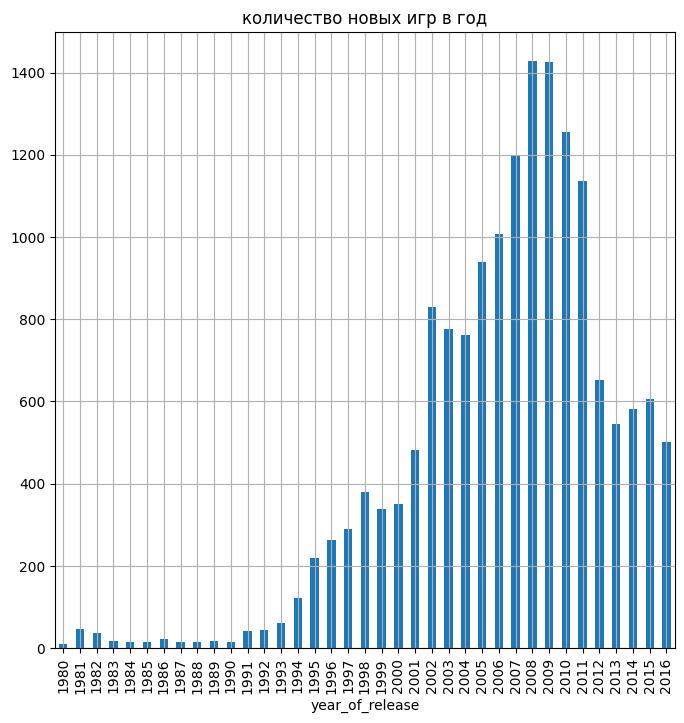

In [60]:
games_count_y = df.pivot_table(index='year_of_release', values='name', aggfunc='count' )
games_count_y.plot(kind='bar', figsize=(8,8), title='количество новых игр в год', legend=None, grid = True);

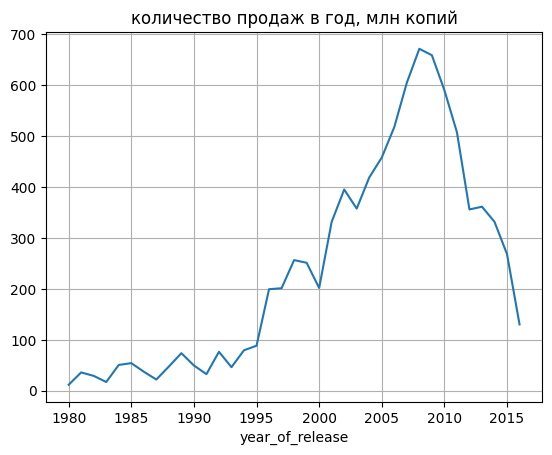

In [61]:
sales_year = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum' )
sales_year.plot(title='количество продаж в год, млн копий', legend=None, grid = True);

## Общий вывод

Вывод:
> Задача — получить данные,выполнить предобработку, изучить их, найти интересные особенности и зависимости развития индустрии игропрома, оформить результатов.

Были изучены исторические и обработаны данные о продажах игр, найдены и заполнены пробелы и недочеты, опеределен диапазон актуальных репрезентативных данных, проверено несколько гипотез, найдены перспективные платформы для продажи игр в следующем году, определены наиболее интересующие игроков жанры, найдены интересные закономерности успешности игры и оценок критиков / обзорщиков.

При формулировании цели были определены гипотезы:
* самая популярная платформа для игр - ПК - опровергнуто
* количество игр с каждым годом растет - в целом не опровергнуто, но при ближайшем приближении увидели и падения, в акульном периоде - опровергнуто
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не опровергнуто
* средние пользовательские рейтинги жанров Action и Sports разные - не опровергнуто



интересные особенности и закономерности:

* перспективные платформы: акутальные модели от брендов microsoft sony nintendo
* перспективные жанры:экшен, шутер, рпг; (если в америке и европе - то еще и спорт; в японии - файтинг)
* жизненный цикл платформы в среднем за 10 лет; более современные появляются и пропадают немного быстрее: 6-10
* в японии не стоит выбирать целевой аудиторией взослых
* хорошие оценки критиков и обзоров коррелируют с выдающимся уровнем продаж
* быстрее всего развивается именно рынок консолей
* рынок консолей поделен 3 компаниями: сони, нинтендо и майкрософт
* с учетом большой популярности "простеньких" игр в прошлом, с большим уровнем продаж, можно ожидать успех и развитие портативных мини приставок ~размером с телефон
* продажи на пс4 распределены на удивление равномерно, вероятность что один проект провалится а другой будет супер успешным (как это свойственно пк) намного ниже; ниже дисперсия и выше стабильность
* японию наверное можно считать одним из важных развивателей индустрии игропрома 



по продажам с большим отрывом лидируют консоли, **рынок захватили 2 гиганта-конкурента; Sony и Microsoft** с моделями **playstation и xbox** разного вида, **Nintendo** завершает тройку пока оставая, и судя по всему понимая это - выбрало себе стратегией - отличающийся сегмент рынка - портативные игровые консоли а так же в основном работая на собственный лояльный рынок.


> * Итог: при планированировании рекламной комании на 2017 год следует обратить внимание на игры жанров: экшен, рпг, шутеры; в зависимисти от целевой аудитории по региону - данные могут заметно менятся, например очень популярные в остальном мире спортивные игры в Японии могут провалится (если конечно это не файтинг). (А еще не стоит например, планировать продавать там экслюзивы на Xbox)
> * Самые перспективные платформы в порядке интереса: PS4, XOne, PS3, 3DS, X360 
> * есть смысл рассмотреть новые версии приставок этих брендов на момент их выхода, как показывает статистика они быстро перехватывают эстафету по продажам

